In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/Estados/Caracteristicas_estados.xlsx')
df2=df[df['Estado']!='Ciudad de México']
df2=df2[df['Estado']!='México']
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Estado,poblacion,pib_18,pib_mineria,pib_ajustado,pib_pc_18,pib_turismo,turismo_pct,turismo_adj,dens_pob_15,...,hogares,carencia_salud,salud_pct,escolaridad,tasa_informal,letalidad,mortalidad,contagios,probit1,probit
0,Aguascalientes,1312544,224807,691,224116,170749.323451,4396,0.019555,0.019615,233.700000,...,9017,1035,0.114783,13.70000,41.271800,0.062754,14.094766,224.601994,-0.057600,-0.05620
1,Baja California,3315766,565895,571,565324,170495.746684,11138,0.019682,0.019702,46.400000,...,11413,1886,0.165250,14.50000,37.330300,0.203266,67.948100,334.281732,0.045800,0.04570
2,Baja California Sur,712029,173047,4887,168160,236170.155991,23710,0.137015,0.140997,9.600000,...,7756,834,0.107530,14.40000,38.731200,0.042083,14.184816,337.064923,-0.053100,-0.06140
3,Campeche,899931,529584,420086,109498,121673.772767,4107,0.007755,0.037508,15.600000,...,6799,792,0.116488,13.10000,62.957800,0.094537,32.113573,339.692710,-0.013100,-0.01470
4,Coahuila de Zaragoza,2954915,609051,13718,595333,201472.123564,6710,0.011017,0.011271,19.500000,...,11582,1557,0.134433,13.60000,34.784600,0.050007,12.183092,243.627989,-0.065700,-0.06780
5,Colima,711235,104475,1660,102815,144558.408965,3354,0.032103,0.032622,126.400000,...,9265,964,0.104047,13.20000,52.008100,0.115594,14.903654,128.930663,-0.005200,-0.00780
6,Chiapas,5217908,271621,5435,266186,51013.931254,5928,0.021825,0.022270,71.200000,...,7207,1261,0.174969,13.10000,71.800500,0.147838,14.220258,96.187974,0.001200,0.00620
7,Chihuahua,3556574,562599,24019,538580,151432.249125,7851,0.013955,0.014577,14.400000,...,12518,1411,0.112718,13.80000,36.912900,0.190789,20.384786,106.844396,0.050700,0.04710
9,Durango,1754754,202547,8204,194343,110752.276387,2739,0.013523,0.014094,14.200000,...,8440,1106,0.131043,13.50000,52.274000,0.066838,10.371824,155.178447,-0.042300,-0.04170
10,Guanajuato,5853677,712902,2998,709904,121274.884145,13335,0.018705,0.018784,191.300000,...,10539,1393,0.132176,13.40000,53.859800,0.047252,9.942469,210.414753,-0.074800,-0.07270


In [3]:
ye=['letalidad','mortalidad','contagios','probit']
equis=['pib_pc_18','edad_mediana_15','10_muertes_dias','dens_pob_15','camas_100mil','escolaridad']

for i in range(len(equis)):
    df2['ln_'+equis[i]]=np.log(df2[equis[i]])

In [4]:
equis2=['ln_pib_pc_18','ln_edad_mediana_15','ln_10_muertes_dias','ln_dens_pob_15','ln_camas_100mil','ln_escolaridad']
X=np.log(df2[equis2])
X['pob_urbana']=df2['pob_urbana']
X['pobre_pct']=df2['pobre_pct']
X['salud_pct']=df2['salud_pct']
X['turismo_adj']=df2['turismo_adj']
X['tasa_informal']=df2['tasa_informal']/100
X['ln_10_muertes_dias_2']=df2['ln_10_muertes_dias']**2
X['ln_10_muertes_dias_3']=df2['ln_10_muertes_dias']**3
X = sm.add_constant(X)


In [5]:
y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1.748
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.139
Time:                        12:51:41   Log-Likelihood:                 73.989
No. Observations:                  31   AIC:                            -120.0
Df Residuals:                      17   BIC:                            -99.90
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   38.8911     76.073      0.511      0.616    -121.609     199.391
ln_pib_pc_18            -1.1074      0.551     -2.011      0.060      -2.269       0.055
ln_edad_mediana_15       0.5966      0.560      1.066      0.302      -0.585       1.778
ln_10_muertes_dias     -55.6899    119.882     -0.465      0.648    -308.619     197.239
ln_dens_pob_15           0.0124      0.028      0.445      0.662      -0.047       0.071
ln_camas_100mil          0.0246      0.160      0.153      0.880      -0.314       0.363
ln_escolaridad           0.8579      0.565      1.517      0.148      -0.335       2.051
pob_urbana              -0.0045      0.081     -0.056      0.956      -0.176       0.167
pobre_pct                0.0105      0.115      0.092      0.928      -0.232       0.253
salud_pct               -0.1197      0.295     -0.406      0.690      -0.742       0.502
turismo_adj              0.1829      0.138      1.325      0.203      -0.108       0.474
tasa_informal           -0.0825      0.133     -0.620      0.543      -0.363       0.198
ln_10_muertes_dias_2     4.0382      9.509      0.425      0.676     -16.023      24.099
ln_10_muertes_dias_3    -0.3919      0.971     -0.404      0.691      -2.440       1.656
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                0.658
Skew:                           0.328   Prob(JB):                        0.720
Kurtosis:                       3.281   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X=X.drop(columns='pob_urbana')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     2.005
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0885
Time:                        12:51:41   Log-Likelihood:                 73.986
No. Observations:                  31   AIC:                            -122.0
Df Residuals:                      18   BIC:                            -103.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   38.5033     73.626      0.523      0.607    -116.179     193.185
ln_pib_pc_18            -1.1128      0.527     -2.112      0.049      -2.220      -0.006
ln_edad_mediana_15       0.5878      0.522      1.126      0.275      -0.509       1.685
ln_10_muertes_dias     -55.0716    116.014     -0.475      0.641    -298.808     188.665
ln_dens_pob_15           0.0122      0.027      0.455      0.655      -0.044       0.068
ln_camas_100mil          0.0227      0.152      0.149      0.883      -0.297       0.343
ln_escolaridad           0.8623      0.544      1.584      0.131      -0.281       2.006
pobre_pct                0.0108      0.111      0.097      0.924      -0.223       0.245
salud_pct               -0.1242      0.276     -0.450      0.658      -0.704       0.456
turismo_adj              0.1822      0.134      1.364      0.189      -0.098       0.463
tasa_informal           -0.0806      0.125     -0.645      0.527      -0.343       0.182
ln_10_muertes_dias_2     3.9913      9.205      0.434      0.670     -15.348      23.331
ln_10_muertes_dias_3    -0.3873      0.940     -0.412      0.685      -2.362       1.588
==============================================================================
Omnibus:                        1.592   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                0.719
Skew:                           0.339   Prob(JB):                        0.698
Kurtosis:                       3.313   Cond. No.                     2.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X=X.drop(columns='pobre_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     2.306
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0529
Time:                        12:51:41   Log-Likelihood:                 73.978
No. Observations:                  31   AIC:                            -124.0
Df Residuals:                      19   BIC:                            -106.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.7327     69.424      0.529      0.603    -108.574     182.040
ln_pib_pc_18            -1.1313      0.478     -2.366      0.029      -2.132      -0.131
ln_edad_mediana_15       0.5836      0.507      1.152      0.264      -0.477       1.644
ln_10_muertes_dias     -52.1488    109.041     -0.478      0.638    -280.375     176.077
ln_dens_pob_15           0.0124      0.026      0.477      0.639      -0.042       0.067
ln_camas_100mil          0.0197      0.145      0.136      0.893      -0.284       0.324
ln_escolaridad           0.8532      0.522      1.635      0.119      -0.239       1.946
salud_pct               -0.1275      0.267     -0.478      0.638      -0.685       0.431
turismo_adj              0.1807      0.129      1.399      0.178      -0.090       0.451
tasa_informal           -0.0740      0.102     -0.726      0.476      -0.287       0.139
ln_10_muertes_dias_2     3.7557      8.642      0.435      0.669     -14.332      21.843
ln_10_muertes_dias_3    -0.3630      0.882     -0.412      0.685      -2.209       1.483
==============================================================================
Omnibus:                        1.693   Durbin-Watson:                   2.265
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                0.790
Skew:                           0.356   Prob(JB):                        0.674
Kurtosis:                       3.324   Cond. No.                     2.30e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X=X.drop(columns='ln_camas_100mil')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     2.666
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0297
Time:                        12:51:41   Log-Likelihood:                 73.963
No. Observations:                  31   AIC:                            -125.9
Df Residuals:                      20   BIC:                            -110.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   39.1847     65.367      0.599      0.556     -97.168     175.538
ln_pib_pc_18            -1.1139      0.449     -2.480      0.022      -2.051      -0.177
ln_edad_mediana_15       0.5952      0.487      1.223      0.236      -0.420       1.611
ln_10_muertes_dias     -56.0107    102.647     -0.546      0.591    -270.129     158.108
ln_dens_pob_15           0.0116      0.025      0.470      0.644      -0.040       0.063
ln_escolaridad           0.8746      0.485      1.802      0.087      -0.138       1.887
salud_pct               -0.1239      0.259     -0.479      0.637      -0.664       0.416
turismo_adj              0.1818      0.126      1.445      0.164      -0.081       0.444
tasa_informal           -0.0720      0.098     -0.732      0.472      -0.277       0.133
ln_10_muertes_dias_2     4.0558      8.147      0.498      0.624     -12.938      21.050
ln_10_muertes_dias_3    -0.3934      0.832     -0.473      0.641      -2.129       1.342
==============================================================================
Omnibus:                        1.738   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.788
Skew:                           0.343   Prob(JB):                        0.674
Kurtosis:                       3.373   Cond. No.                     2.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X=X.drop(columns='ln_dens_pob_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     3.051
Date:                Tue, 21 Jul 2020   Prob (F-statistic):             0.0169
Time:                        12:51:41   Log-Likelihood:                 73.793
No. Observations:                  31   AIC:                            -127.6
Df Residuals:                      21   BIC:                            -113.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   40.1416     64.111      0.626      0.538     -93.186     173.469
ln_pib_pc_18            -1.0868      0.437     -2.486      0.021      -1.996      -0.178
ln_edad_mediana_15       0.5876      0.477      1.231      0.232      -0.405       1.580
ln_10_muertes_dias     -57.4754    100.678     -0.571      0.574    -266.848     151.897
ln_escolaridad           0.9370      0.458      2.045      0.054      -0.016       1.890
salud_pct               -0.0803      0.237     -0.339      0.738      -0.573       0.413
turismo_adj              0.1681      0.120      1.400      0.176      -0.082       0.418
tasa_informal           -0.0610      0.094     -0.651      0.522      -0.256       0.134
ln_10_muertes_dias_2     4.1517      7.992      0.520      0.609     -12.468      20.771
ln_10_muertes_dias_3    -0.4023      0.816     -0.493      0.627      -2.100       1.295
==============================================================================
Omnibus:                        2.066   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.001
Skew:                           0.381   Prob(JB):                        0.606
Kurtosis:                       3.440   Cond. No.                     2.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X=X.drop(columns='salud_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     3.561
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00856
Time:                        12:51:42   Log-Likelihood:                 73.709
No. Observations:                  31   AIC:                            -129.4
Df Residuals:                      22   BIC:                            -116.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   42.8562     62.316      0.688      0.499     -86.379     172.091
ln_pib_pc_18            -1.0989      0.427     -2.575      0.017      -1.984      -0.214
ln_edad_mediana_15       0.6172      0.460      1.342      0.193      -0.336       1.571
ln_10_muertes_dias     -61.9616     97.775     -0.634      0.533    -264.734     140.811
ln_escolaridad           0.9620      0.443      2.172      0.041       0.043       1.881
turismo_adj              0.1755      0.116      1.518      0.143      -0.064       0.415
tasa_informal           -0.0704      0.088     -0.803      0.430      -0.252       0.111
ln_10_muertes_dias_2     4.5260      7.754      0.584      0.565     -11.555      20.607
ln_10_muertes_dias_3    -0.4416      0.791     -0.558      0.583      -2.083       1.200
==============================================================================
Omnibus:                        2.260   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.177
Skew:                           0.431   Prob(JB):                        0.555
Kurtosis:                       3.409   Cond. No.                     2.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X=X.drop(columns='ln_10_muertes_dias_3')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     4.150
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00436
Time:                        12:51:42   Log-Likelihood:                 73.491
No. Observations:                  31   AIC:                            -131.0
Df Residuals:                      23   BIC:                            -119.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.1533      3.790      2.151      0.042       0.312      15.994
ln_pib_pc_18            -1.0452      0.410     -2.552      0.018      -1.892      -0.198
ln_edad_mediana_15       0.6544      0.448      1.460      0.158      -0.273       1.581
ln_10_muertes_dias      -7.4484      3.710     -2.007      0.057     -15.124       0.227
ln_escolaridad           0.8451      0.384      2.198      0.038       0.050       1.640
turismo_adj              0.1700      0.113      1.498      0.148      -0.065       0.405
tasa_informal           -0.0579      0.083     -0.694      0.494      -0.231       0.115
ln_10_muertes_dias_2     0.2000      0.097      2.062      0.051      -0.001       0.401
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.567
Skew:                           0.520   Prob(JB):                        0.457
Kurtosis:                       3.365   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X=X.drop(columns='tasa_informal')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     4.866
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00221
Time:                        12:51:42   Log-Likelihood:                 73.169
No. Observations:                  31   AIC:                            -132.3
Df Residuals:                      24   BIC:                            -122.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.9440      3.737      2.126      0.044       0.230      15.658
ln_pib_pc_18            -0.7940      0.190     -4.184      0.000      -1.186      -0.402
ln_edad_mediana_15       0.5370      0.410      1.308      0.203      -0.310       1.384
ln_10_muertes_dias      -7.7012      3.652     -2.109      0.046     -15.239      -0.163
ln_escolaridad           0.7840      0.370      2.118      0.045       0.020       1.548
turismo_adj              0.1498      0.109      1.381      0.180      -0.074       0.374
ln_10_muertes_dias_2     0.2068      0.095      2.166      0.040       0.010       0.404
==============================================================================
Omnibus:                        4.606   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.032
Skew:                           0.683   Prob(JB):                        0.220
Kurtosis:                       3.694   Cond. No.                     2.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X=X.drop(columns='ln_edad_mediana_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     5.345
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00178
Time:                        12:51:42   Log-Likelihood:                 72.102
No. Observations:                  31   AIC:                            -132.2
Df Residuals:                      25   BIC:                            -123.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5529      3.761      2.274      0.032       0.808      16.298
ln_pib_pc_18            -0.6748      0.169     -3.998      0.000      -1.022      -0.327
ln_10_muertes_dias      -8.0272      3.695     -2.172      0.040     -15.638      -0.417
ln_escolaridad           0.8136      0.375      2.172      0.040       0.042       1.585
turismo_adj              0.1179      0.107      1.100      0.282      -0.103       0.339
ln_10_muertes_dias_2     0.2165      0.097      2.243      0.034       0.018       0.415
==============================================================================
Omnibus:                        1.468   Durbin-Watson:                   2.461
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                0.773
Skew:                           0.380   Prob(JB):                        0.679
Kurtosis:                       3.146   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X=X.drop(columns='turismo_adj')

y=df2['probit']
model1 = sm.OLS(y, X).fit()
res1=model1.summary()
pred1=model1.predict(X)
res1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     6.328
Date:                Tue, 21 Jul 2020   Prob (F-statistic):            0.00108
Time:                        12:51:42   Log-Likelihood:                 71.370
No. Observations:                  31   AIC:                            -132.7
Df Residuals:                      26   BIC:                            -125.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.6511      3.775      2.292      0.030       0.892      16.410
ln_pib_pc_18            -0.6301      0.165     -3.831      0.001      -0.968      -0.292
ln_10_muertes_dias      -8.1507      3.708     -2.198      0.037     -15.773      -0.528
ln_escolaridad           0.7085      0.364      1.948      0.062      -0.039       1.456
ln_10_muertes_dias_2     0.2207      0.097      2.279      0.031       0.022       0.420
==============================================================================
Omnibus:                        0.808   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.668   Jarque-Bera (JB):                0.407
Skew:                           0.281   Prob(JB):                        0.816
Kurtosis:                       3.006   Cond. No.                     2.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

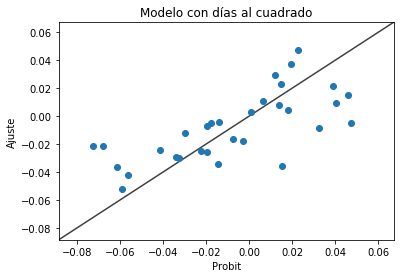

In [15]:
comparacion=pd.DataFrame(df2[['Estado','probit']])
comparacion['ajuste']=pred1

fig, ax = plt.subplots()
ax.scatter(comparacion['probit'],comparacion['ajuste'])

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.title('Modelo con días al cuadrado')
plt.ylabel('Ajuste')
plt.xlabel('Probit')
plt.show()



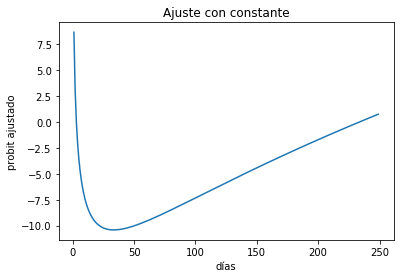

In [16]:
coef=pd.DataFrame(model1.params)

ln_dias=np.log(range(1,250))
ln_dias2=ln_dias**2
probit_adj=coef.iloc[0,0] + coef.iloc[2,0]*ln_dias + coef.iloc[4,0]*ln_dias*ln_dias2

plt.plot(range(1,250),probit_adj)
plt.xlabel('días')
plt.ylabel('probit ajustado')
plt.title('Ajuste con constante')
plt.show()